In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Introducción
## Comportamiento estático
En una celda Peltier los efectos de mayor relevancia para la construcción de un modelo de la misma son: el efecto Joule y el efecto Seebeck y la conducción.

Dado un flujo de calor $Q_f$ sobre la cara fría, el equilibrio se obtiene cuando se cumple que:

$$ Q_f = \alpha\, I\,T_f - \dfrac{I^2\,R}{2}- \dfrac{\Delta T}{R_{th}} $$

Sin embargo, dado que en las hojas de datos no se estipulan los valores de $\alpha$ ni de $R$ es preciso recurrir a otra ecuación para poder obtenerlos. Entonces se recurre a la de la potencia electrica disipada por el peltier:

$$ P_e = \alpha \, I \, \Delta T + I^2 \, R $$

Dado que se esta midiendo sistemas de intercambio de calor pasivos, $Q_f$ en equilibrio será dependiente de la diferencia de temperaturas y la resistencia térmica del medio. Si se considera al aire como un aislante con resistencia térmica muy elevada frente a la del peltier puede aproximarse $Qf$ a 0 W. Sin embargo, de no ser ese el caso, al estimar $R_{th}$ se estará midiendo, en realidad, la resistencia térmica del conjunto peltier y el material que este encima del mismo.
## Comportamiento dinámico
En este caso, un modelo exacto es dificil de conseguir. Sin embargo, los datos experimentales muestran que la respuesta transitoria del peltier se asemeja a la de la carga de un capacitor. Esta capacidad refleja la inercia térmica del peltier y puede estimarse realizando ensayos experimentales.

En consecuencia, tomando la corriente como señal de control, se puede decir que la funcioón de transferencia de la celda peltier es:

$$ \dfrac{\Delta T(s)}{I(s)} = \dfrac{(\alpha\, T_c)\,R_{th}}{1+R_{th}\,C_f\,s} $$

## Dimensionando el peltier
Para dimensionar un peltier es preciso saber los máximos de $Q_f$, $T_c$, $T_f$ e $I$ que se utilizaran en el proyecto. Una vez fijado el máximo $Q_f$ se desea tomar el peltier con la menor corriente máxima puesto que ese será el más eficiente. Para estimar $Q_f$ se realizaron las mismas mediciones anteriores pero con un brazo en lugar de aire.

## Dimensionando el disipador
El disipador a utilizar debe ser capaz de mantener la cara caliente a temperaturas cercanas a la ambiente. Su resistencia térmica debe ser menor a:

$$ R_d < \dfrac{1ºC}{Q_c} $$

donde $Q_c$ es

$$Q_c = \alpha\, I\,T_c + \dfrac{I^2\,R}{2} + \dfrac{\Delta T}{R_{th}}$$

## Controlando el peltier
Es esperable que haya una gran variación en los parámetros $R_{th}$ y $C_f$ por lo cual es preciso diseñar un sistema de control inmune a dichas variaciones. La realimentación será clave.

# Obtención de los parámetros a lazo abierto
## Medición al aire

Se realizaron varias mediciones con dos testers de la corriente y la tensíon sobre el peltier y se midió también la temperatura de la cara fría. Suponiendo que la temperatura sobre la cara caliente era la ambiente y con el peltier refrigereando el aire (aislante) se obtuvo que:

| I [A] 	| V [V] 	| Tf [ºC] 	| Tc [ºC] 	|
|-------	|-------	|---------	|---------	|
| 0.67  	| 1.40  	| 18.0    	| 23.0    	|
| 1.08  	| 2.22  	| 16.0    	| 23.0    	|
| 1.47  	| 2.94  	| 13.3    	| 23.0    	|
| 1.97  	| 4.00  	| 10.5    	| 23.0    	|
| 2.35  	| 4.97  	| 9.0     	| 23.0    	|
| 2.80  	| 5.60  	| 6.0     	| 24.0    	|

A continuación se realizó un ajuste para obtener los valores de $\alpha$ y $R$.

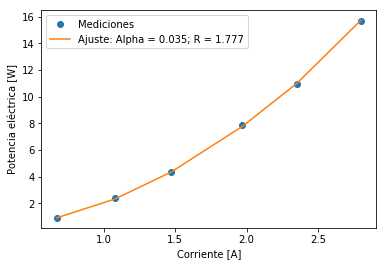

In [23]:
# DATOS
I = np.array([0.67,1.08,1.47,1.97,2.35,2.8])
Tf = np.array([18,16,13.33,10.5,9,6])
Tc = np.array([23,23,23,23,23,24])
V = np.array([1.4,2.22,2.94,4,4.67,5.6])

# ESTIMACIÓN ALFA Y R
# Se hace cuadrados mínimos con
# x = [alpha,R] b = Pe = V*I
A=np.vstack([I*(Tc-Tf),I**2]).T
(alpha,R) = np.linalg.lstsq(A,V*I,rcond=None)[0]

# RESULTADOS
fig, ax = plt.subplots()
ax.plot(I,I*V,'o')
ax.plot(I,alpha*I*(Tc-Tf)+I**2*R)
ax.set(ylabel='Potencia eléctrica [W]',xlabel='Corriente [A]')
ax.legend(['Mediciones',('Ajuste: Alpha = '+str(alpha)[:5]+'; R = '+str(R)[:5])])

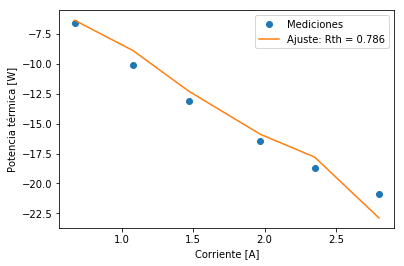

In [27]:
# ESTIMACIÓN RTH
# Con la ecuación de Qf se puede armar un sistama de ecuaciones b=Ax
# con x = Gth donde Gth es 1/Rth y b= I^2*R/2 - alfa*I*Delta T
b=I**2*R/2-alpha*I*(Tf+273)
B=np.vstack(-(Tc-Tf))
Gth = np.linalg.lstsq(B,b,rcond=None)[0]
Rth=1/Gth
# RESULTADOS
fig, ax = plt.subplots()
ax.plot(I,b,'o')
ax.plot(I,-(Tc-Tf)/Rth)
ax.set(ylabel='Potencia térmica [W]',xlabel='Corriente [A]')
ax.legend(['Mediciones',('Ajuste: Rth = '+str(Rth)[1:6])])

## Medición con brazo
Los valores medidos con el brazo fueron

| I [A] 	| V [V] 	| Tf [ºC] 	| Tc [ºC] 	|
|-------	|-------	|---------	|---------	|
| 0.67  	| 1.35  	| 20.0    	| 24.0    	|
| 1.03  	| 2.15  	| 19.0    	| 24.0    	|
| 1.41  	| 2.94  	| 17.0    	| 24.5    	|
| 1.99  	| 4.06  	| 14.5    	| 24.5    	|
| 2.34  	| 4.77  	| 12.0    	| 24.5    	|
| 2.78  	| 5.65  	| 10.5    	| 24.5    	|

Con ellos se hicieron los siguientes ajustes

Error relativo al primer ensayo: Alpha 0.8392422460919446 ; R 0.09069346175060089


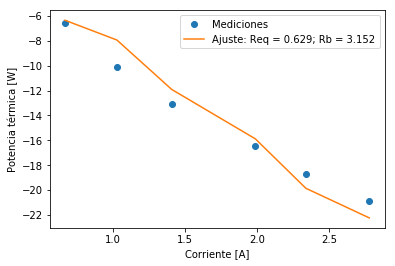

In [30]:
# DATOS
I = np.array([0.67,1.03,1.41,1.99,2.34,2.78])
Tf = np.array([20,19,17,14.5,12,10.5])
Tc = np.array([24,24,24.5,24.5,24.5,24.5])
V = np.array([1.35,2.15,2.94,4.06,4.77,5.65])

# ESTIMACION ALPHA R Y RTH
A=np.vstack([I*(Tc-Tf),I**2]).T
B=np.vstack(-(Tc-Tf))
(alpham,Rm) = np.linalg.lstsq(A,V*I,rcond=None)[0]
Geq = np.linalg.lstsq(B,I**2*R/2-alpha*I*(Tf+273),rcond=None)[0]
Req=1/Geq
Rb=Req*Rth/(Rth-Req)
# RESULTADOS
fig, ax = plt.subplots()
ax.plot(I,b,'o')
ax.plot(I,-(Tc-Tf)/Req)
ax.set(ylabel='Potencia térmica [W]',xlabel='Corriente [A]')
ax.legend(['Mediciones',('Ajuste: Req = '+str(Req)[1:6]+'; Rb = '+str(Rb)[1:6])])
print("Error relativo al primer ensayo: Alpha",(alpha-alpham)/alpham,"; R",(Rm-R)/R)

## Teniendo en cuenta ambas mediciones

In [49]:
# DATOS
I = np.array([1.08,1.47,1.97,2.35,2.8,0.67,# sin mano
              0.67,1.03,1.41,1.99,2.34,2.78])# con mano
Tf = np.array([16,13.33,10.5,9,6,18,# sin mano
               20,19,17,14.5,12,10.5])# con mano
Tc = np.array([23,23,23,23,24,23,# sin mano
               24,24,24.5,24.5,24.5,24.5])# con mano
V = np.array([2.22,2.94,4,4.67,5.6,1.4,# sin mano
              1.35,2.15,2.94,4.06,4.77,5.65])# con mano
# CUENTAS
# Con la ecuación de Pe se puede armar un sistema de ecuaciones b=Ax
# con x = [alpha,R] b = Pe@xi = V*I
# estos son datos caracteristicos del peltier y solo varían con la temperatura, que en ambas mediciones fue 24º
A=np.vstack([I*(Tc-Tf),I**2]).T
(alpha,R) = np.linalg.lstsq(A,V*I,rcond=None)[0]

# RESULTADO
print("Alpha es",alpha,"R es",R)

Alpha es -0.025209420462913027 R es 2.163481622659092


Se ve que no son parámetros tan independientes de las condiciones de contorno

## Obtención de  $C_f$ y verificación modelo
Se midió la respuesta al escalón en varias condiciones y se estimo C_f. Luego se verificó el modelo comparando las respuestas al escalon medidas con las teóricas.
### Respuesta al escalón al aire

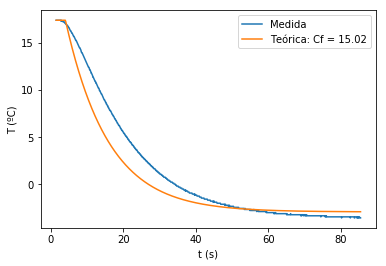

In [38]:
# CARGA DE DATOS ESCALÓN
data = np.loadtxt("data/openloop5V.csv", delimiter=",")
tiempo = data[0,:]
temp = data[1,:]
e=.06 # tolerancia a la exactitud de los puntos de 90% y 10%
# Ploteo los datos para ver que se cargaron bien
plt.plot(tiempo,temp)
plt.xlabel("t (s)")
plt.ylabel("T (ºC)")

# OBTENCIÓN DEL RISE TIME
Tmax=np.max(temp)
Tmin=np.min(temp)
T10=Tmax+(Tmin-Tmax)*0.1
T90=Tmax+(Tmin-Tmax)*0.9
# Como los valores temporales pueden ser tuplas, o sea 
# que puede haber tiempos donde el valor de la temperatura
# no cambio, tomo aquellos que me dan el tau mas grande
t10=tiempo[np.logical_and(temp>T10-e, temp<T10+e)]
t90=tiempo[np.logical_and(temp>T90-e, temp<T90+e)]
tr=np.max(t90)-np.min(t10)

# CALCULO DE Cf
tau=tr/3
I=2.5
Tc=17
Cf=tau/Rth

# VERIFICACIÓN
Tstart = 4 # El 4 lo saque a ojo
plt.plot(tiempo,Tmax-I*alpha*(Tc+273)*Rth*(1-np.exp(-(tiempo-Tstart)/tau))*np.heaviside(tiempo-Tstart,0.5))
plt.legend(['Medida',('Teórica: Cf = '+str(Cf)[1:6])])

### Respuesta al escalón con brazo

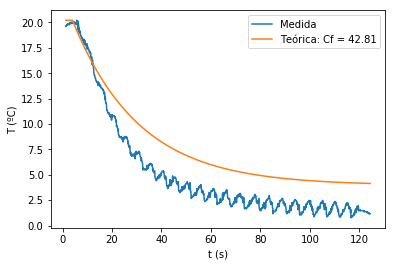

In [39]:
# CARGA DE DATOS ESCALÓN
data = np.loadtxt("data/openloopHand5V.csv", delimiter=",")
tiempo = data[0,:]
temp = data[1,:]
e=.06 # tolerancia a la exactitud de los puntos de 90% y 10%
# Ploteo los datos para ver que se cargaron bien
plt.plot(tiempo,temp)
plt.xlabel("t (s)")
plt.ylabel("T (ºC)")

# OBTENCIÓN DEL RISE TIME
Tmax=np.max(temp)
Tmin=np.min(temp)
T10=Tmax+(Tmin-Tmax)*0.1
T90=Tmax+(Tmin-Tmax)*0.9
t10=tiempo[np.logical_and(temp>T10-e, temp<T10+e)]
t90=tiempo[np.logical_and(temp>T90-e, temp<T90+e)]
# Como los valores temporales pueden ser tuplas, o sea 
# que puede haber tiempos donde el valor de la temperatura
# no cambio, tomo aquellos que me dan el tau mas grande
tr=np.max(t90)-np.min(t10)
tau=tr/3

# CALCULO DE Cf
I=2.5
Tc=17
Cf=tau/Req

# VERIFICACIÓN
Tstart = 4 # El 4 lo saque a ojo
plt.plot(tiempo,Tmax-I*alpha*(Tc+273)*Req*(1-np.exp(-(tiempo-Tstart)/tau))*np.heaviside(tiempo-Tstart,0.5))
plt.legend(['Medida',('Teórica: Cf = '+str(Cf)[1:6])])

Podría asegurar que esto da distinto porque está medidio a Ta=17º y el modelo del peltier esta medido a 24º
### Respuesta al escalón con brazo a 24º

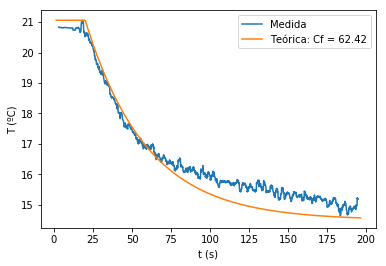

In [41]:
# CARGA DE DATOS ESCALÓN
data = np.loadtxt("data/openloopHand1A.csv", delimiter=",")
tiempo = data[0,:]
temp = data[1,:]
N=16
temp = np.convolve(temp,np.ones(N,)/N,'same')
e=.06 # tolerancia a la exactitud de los puntos de 90% y 10%
# Ploteo los datos para ver que se cargaron bien
plt.plot(tiempo[N:-N],temp[N:-N])
plt.xlabel("t (s)")
plt.ylabel("T (ºC)")

# OBTENCIÓN DEL RISE TIME
Tmax=np.max(temp[N:-N])
Tmin=np.min(temp[N:-N])
T10=Tmax+(Tmin-Tmax)*0.1
T90=Tmax+(Tmin-Tmax)*0.9
# Como los valores temporales pueden ser tuplas, o sea 
# que puede haber tiempos donde el valor de la temperatura
# no cambio, tomo aquellos que me dan el tau mas grande
t10=tiempo[np.logical_and(temp>T10-e, temp<T10+e)]
t90=tiempo[np.logical_and(temp>T90-e, temp<T90+e)]
tr=np.min(t90)-np.max(t10)

# CALCULO DE Cf
tau=tr/3
I=1
Tc=20
Cf=tau/Req

# VERIFICACIÓN
Tstart = 20 # El 4 lo saque a ojo
plt.plot(tiempo,Tmax-I*alpha*(Tc+273)*Req*(1-np.exp(-(tiempo-Tstart)/tau))*np.heaviside(tiempo-Tstart,0.5))
plt.legend(['Medida',('Teórica: Cf = '+str(Cf)[1:6])])